# PySpark GraphFrames

In PySpark, a "graph" typically refers to a data structure that represents a network of nodes (vertices) and the connections between them (edges). PySpark provides two primary libraries for working with graphs: GraphX and GraphFrames.

* GraphX: GraphX is the original graph processing library in PySpark. It is built on top of the Spark RDD (Resilient Distributed Dataset) API and provides a way to create and manipulate distributed graphs. GraphX uses a lower-level API based on RDDs, which can be less user-friendly for some tasks.


* GraphFrames: GraphFrames is a higher-level graph processing library for PySpark, which provides a more intuitive and DataFrame-like API for working with graphs. It is built on top of the Spark DataFrame API and is designed to be more user-friendly and expressive when dealing with graph data.

In this notebook, we will proceed with PySpark GraphFrames.

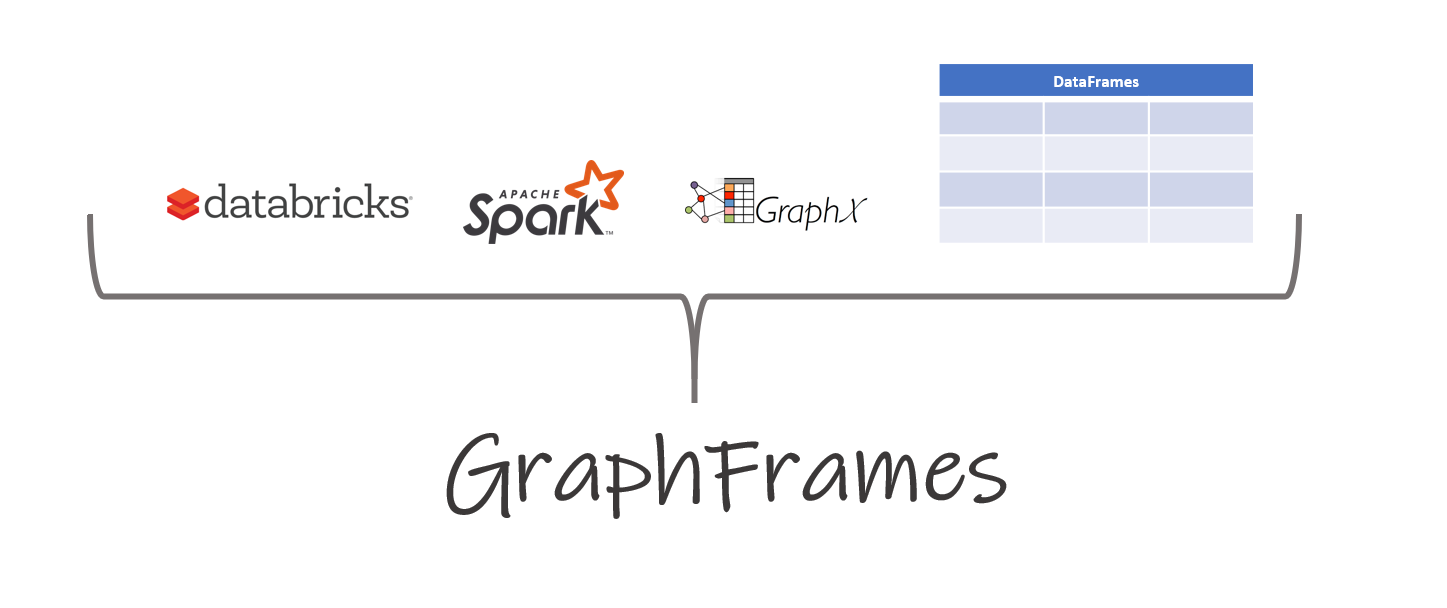

## Import necessary libraries

In [4]:
# Import the findspark library to initialize Spark
import findspark
findspark.init()

# Import the PySpark library
import pyspark
#  Import  SparkSession
from pyspark.sql import SparkSession

# Import the GraphFrames library
from graphframes import *

In [5]:
# Create a SparkSession with the specified application name 'graphframes'
spark = SparkSession.builder.appName('graphframes').getOrCreate()

### GraphFrames can be constructed by users using vertex and edge DataFrames.

1. Vertex DataFrame: A vertex DataFrame is a DataFrame that represents the vertices (nodes) of a graph. It should contain a special column named "id," which specifies unique IDs for each vertex in the graph. The "id" column is used to uniquely identify vertices in the graph.


2. Edge DataFrame: An edge DataFrame is a DataFrame that represents the edges (relationships) between vertices in a graph. It should contain two special columns: "src" and "dst."

      * The "src" column specifies the source vertex ID of the edge.
      * The "dst" column specifies the destination vertex ID of the edge.

### How to create a GraphFrame:


Here's a basic example of how you might create a simple graph using GraphFrames:

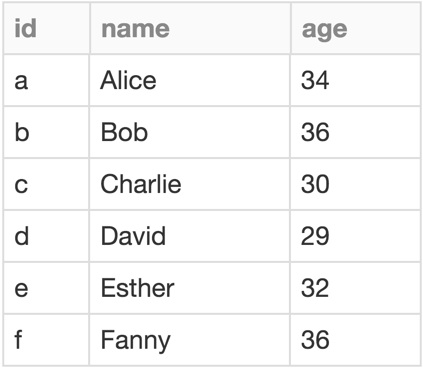


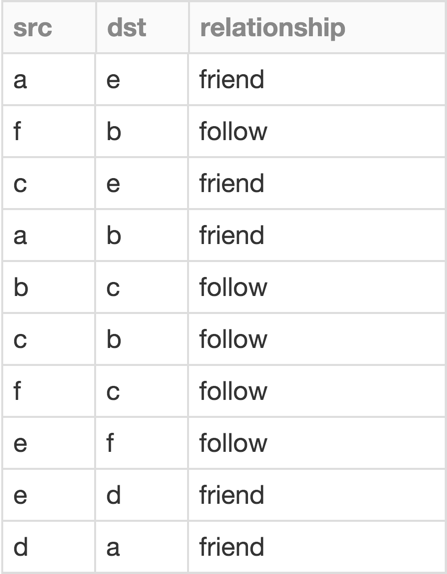

In [8]:
# Create a DataFrame for vertices
vertics = spark.createDataFrame([
    ("a", "Alice", 34),
    ("b", "Bob", 36),
    ("c", "Charlie", 30),
    ("d", "David", 29),
    ("e", "Esther", 32),
    ("f", "Fanny", 36)],
    ["id", "name", "age"])

In [6]:
# Create a DataFrame for edges
edges = spark.createDataFrame([
    ("a", "e", "friend"),
    ("f", "b", "follow"),
    ("c", "e", "friend"),
    ("a", "b", "friend"),
    ("b", "c", "follow"),
    ("c", "b", "follow"),
    ("f", "c", "follow"),
    ("e", "f", "follow"),
    ("e", "d", "friend"),
    ("d", "a", "friend")],
    ["src", "dst", "relationship"])


In [10]:
# Create a GraphFrame from vertex and edge DataFrames
g = GraphFrame(vertics, edges)

#### Take a look at the DataFrames

Get vertices, edges, and check the number of edges of each vertex

In [ ]:
# Display the vertices of the graph
g.vertices.show()

# Display the edges of the graph
g.edges.show()


+---+-------+---+
| id|   name|age|
+---+-------+---+
|  a|  Alice| 34|
|  b|    Bob| 36|
|  c|Charlie| 30|
|  d|  David| 29|
|  e| Esther| 32|
|  f|  Fanny| 36|
+---+-------+---+

+---+---+------------+
|src|dst|relationship|
+---+---+------------+
|  a|  e|      friend|
|  f|  b|      follow|
|  c|  e|      friend|
|  a|  b|      friend|
|  b|  c|      follow|
|  c|  b|      follow|
|  f|  c|      follow|
|  e|  f|      follow|
|  e|  d|      friend|
|  d|  a|      friend|
+---+---+------------+



#### Calculate the in-degree and out-degree for each vertex


In graph theory, the terms "in-degree" and "out-degree" are used to describe the number of incoming and outgoing edges connected to a vertex (node) in a directed graph.

* In-Degree: The in-degree of a vertex in a directed graph is the number of incoming edges to that vertex. In other words, it represents how many other vertices have edges pointing toward the given vertex.

* Out-Degree: The out-degree of a vertex in a directed graph is the number of outgoing edges from that vertex. It represents how many other vertices the given vertex has edges pointing to.

In [13]:
# Calculate the in-degree for each vertex
g.inDegrees.show()

+---+---------+
|dst|in_degree|
+---+---------+
|  b|        2|
|  c|        2|
|  e|        1|
|  f|        1|
|  d|        1|
+---+---------+



In [12]:
# Calculate the out-degree for each vertex
g.outDegrees.show()

+---+----------+
|src|out_degree|
+---+----------+
|  a|         2|
|  f|         1|
|  e|         2|
|  c|         1|
|  b|         2|
|  d|         1|
+---+----------+



## Motif finding


Motif finding in PySpark with GraphFrames is a technique for discovering recurring, often small, subgraph patterns within a larger graph. It allows you to search for specific structural configurations or motifs that exist in the graph data. These motifs can represent interesting or important relationships or patterns within the graph, and their discovery can provide valuable insights into the data.

In [ ]:
# Find instances of a motif pattern in the graph 'g'
# This pattern consists of two edges and three vertices: (a)-(b)-(c)
# The "->" notation specifies edges, and "()" denotes vertices
# The variables 'a', 'b', 'c', 'e1', and 'e2' are placeholders for vertices and edges
# 'e1' and 'e2' represent the edges between 'a'-'b' and 'b'-'c', respectively
result = g.find("(a)-[e1]->(b);(b)-[e2]->(c)")

+----------------+--------------+----------------+--------------+----------------+
|               a|            e1|               b|            e2|               c|
+----------------+--------------+----------------+--------------+----------------+
|[c, Charlie, 30]|[c, e, friend]| [e, Esther, 32]|[e, f, follow]|  [f, Fanny, 36]|
|  [a, Alice, 34]|[a, e, friend]| [e, Esther, 32]|[e, f, follow]|  [f, Fanny, 36]|
|  [f, Fanny, 36]|[f, c, follow]|[c, Charlie, 30]|[c, e, friend]| [e, Esther, 32]|
|    [b, Bob, 36]|[b, c, follow]|[c, Charlie, 30]|[c, e, friend]| [e, Esther, 32]|
|  [d, David, 29]|[d, a, friend]|  [a, Alice, 34]|[a, e, friend]| [e, Esther, 32]|
|[c, Charlie, 30]|[c, e, friend]| [e, Esther, 32]|[e, d, friend]|  [d, David, 29]|
|  [a, Alice, 34]|[a, e, friend]| [e, Esther, 32]|[e, d, friend]|  [d, David, 29]|
| [e, Esther, 32]|[e, f, follow]|  [f, Fanny, 36]|[f, c, follow]|[c, Charlie, 30]|
|  [f, Fanny, 36]|[f, b, follow]|    [b, Bob, 36]|[b, c, follow]|[c, Charlie, 30]|
|[c,

Try to find the mutual friends for any pair of users a and c. In order to be a mutual friend b, b must be a friend with both a and c .

In [ ]:
# Attempt to find mutual friends for any pair of users 'a' and 'c'.
# Mutual friends are users 'b' who are friends with both 'a' and 'c'.
result = g.find("(a)-[e1]->(b);(b)-[e2]->(c)")

# Filter the results to include only cases where 'b' is a mutual friend.
# Specifically, both 'e1' and 'e2' must represent 'friend' relationships.
result = result.filter('e1.relationship="friend" and e2.relationship="friend"')

# Show the results of the mutual friend search.
result.show()

+----------------+--------------+---------------+--------------+---------------+
|               a|            e1|              b|            e2|              c|
+----------------+--------------+---------------+--------------+---------------+
|  [d, David, 29]|[d, a, friend]| [a, Alice, 34]|[a, e, friend]|[e, Esther, 32]|
|[c, Charlie, 30]|[c, e, friend]|[e, Esther, 32]|[e, d, friend]| [d, David, 29]|
|  [a, Alice, 34]|[a, e, friend]|[e, Esther, 32]|[e, d, friend]| [d, David, 29]|
|  [d, David, 29]|[d, a, friend]| [a, Alice, 34]|[a, b, friend]|   [b, Bob, 36]|
| [e, Esther, 32]|[e, d, friend]| [d, David, 29]|[d, a, friend]| [a, Alice, 34]|
+----------------+--------------+---------------+--------------+---------------+



GraphFrames requires you to set a directory where it can save checkpoints. Create such a folder in your working directory

In [ ]:
# Set the checkpoint directory to 'chkpnt' in your working directory.
# This directory will be used for storing intermediate data during graph operations.
spark.sparkContext.setCheckpointDir('chkpnt')

Then, the connected components can easily be computed with the connectedComponents-function.


In [ ]:
g.connectedComponents().show()

+---+-------+---+------------+
| id|   name|age|   component|
+---+-------+---+------------+
|  a|  Alice| 34|412316860416|
|  b|    Bob| 36|412316860416|
|  c|Charlie| 30|412316860416|
|  d|  David| 29|412316860416|
|  e| Esther| 32|412316860416|
|  f|  Fanny| 36|412316860416|
+---+-------+---+------------+



## Filtering

Check vertices when "age" greater than 30 and check edges "relationship" equal "friend"

In [ ]:
# Filter vertices to select those with an age greater than 30.
vg30 = g.vertices.filter('age > 30')

# Show the resulting vertices DataFrame containing users older than 30.
vg30.show()

# Filter edges to select those with a "friend" relationship.
efriend = g.edges.filter('relationship = "friend"')

# Show the resulting edges DataFrame containing "friend" relationships.
efriend.show()


+---+------+---+
| id|  name|age|
+---+------+---+
|  a| Alice| 34|
|  b|   Bob| 36|
|  e|Esther| 32|
|  f| Fanny| 36|
+---+------+---+

+---+---+------------+
|src|dst|relationship|
+---+---+------------+
|  a|  e|      friend|
|  c|  e|      friend|
|  a|  b|      friend|
|  e|  d|      friend|
|  d|  a|      friend|
+---+---+------------+



### Create UDF Functions

UDFs are custom functions that allow users to extend the capabilities of a programming language, query language, or data processing tool to perform specific operations or transformations on data. They are a valuable tool for tailoring data processing and analysis to meet individual needs.



convert your graph by mapping a function over the edges DataFrame that deletes the row if src ≥ dst return "Delete" else "Keep"

In [ ]:
# Define a custom function called 'del_keep' that takes two parameters, 'src' and 'dst'.
def del_keep(src, dst):
    # Check if 'src' is greater than or equal to 'dst'.
    if src >= dst:
        # If 'src' is greater or equal, return 'Delete'.
        return 'Delete'
    else:
        # If 'src' is less than 'dst', return 'Keep'.
        return 'Keep'

# Create a UDF (User-Defined Function) using a lambda function that calls 'del_keep'.
udf1 = udf(lambda a, b: del_keep(a, b))


In [ ]:
# Apply the 'udf1' User-Defined Function (UDF) to the edges DataFrame 'g.edges'.
# This UDF computes a new column 'new' based on the 'src' and 'dst' columns of the edges DataFrame.
e1 = g.edges.withColumn('new', udf1('src', 'dst'))

# Show the resulting DataFrame 'e1' with the new 'new' column.
e1.show()


+---+---+------------+------+
|src|dst|relationship|   new|
+---+---+------------+------+
|  a|  e|      friend|  Keep|
|  f|  b|      follow|Delete|
|  c|  e|      friend|  Keep|
|  a|  b|      friend|  Keep|
|  b|  c|      follow|  Keep|
|  c|  b|      follow|Delete|
|  f|  c|      follow|Delete|
|  e|  f|      follow|  Keep|
|  e|  d|      friend|Delete|
|  d|  a|      friend|Delete|
+---+---+------------+------+



In [ ]:
e1.filter('new="Keep"').drop('new').show()

+---+---+------------+
|src|dst|relationship|
+---+---+------------+
|  a|  e|      friend|
|  c|  e|      friend|
|  a|  b|      friend|
|  b|  c|      follow|
|  e|  f|      follow|
+---+---+------------+

